In [40]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/prepared_zipcode_data.csv", sep = ',')

In [6]:
#Prepare data
X = data.drop(['target',"ZIP", "GEOID", "NAME", "year", "major_city", "county", "state", "ZCTA5CE20", "INTPTLAT20", "INTPTLON20", "Rail_YN", "Stop_YN"], axis=1)  # Features
y = data['target']  # Target variable

In [7]:
#Split training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
#Over Sample Minority Class
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
X_test_over, y_test_over = oversample.fit_resample(X_test, y_test)

In [71]:
# Train NN_2 model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_over.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [72]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
model.fit(X_train_over, y_train_over, epochs=10, batch_size=32, validation_data=(X_test_over, y_test_over))

Epoch 1/10
13818/13818 [==============================] - 76s 5ms/step - loss: 2.3949 - accuracy: 0.7294 - val_loss: 0.4794 - val_accuracy: 0.7851
Epoch 2/10
13818/13818 [==============================] - 74s 5ms/step - loss: 0.4665 - accuracy: 0.7859 - val_loss: 0.4582 - val_accuracy: 0.7934
Epoch 3/10
13818/13818 [==============================] - 75s 5ms/step - loss: 0.4655 - accuracy: 0.7869 - val_loss: 0.4556 - val_accuracy: 0.8031
Epoch 4/10
13818/13818 [==============================] - 85s 6ms/step - loss: 0.4572 - accuracy: 0.7913 - val_loss: 0.4664 - val_accuracy: 0.7991
Epoch 5/10
13818/13818 [==============================] - 75s 5ms/step - loss: 0.4524 - accuracy: 0.7933 - val_loss: 0.4633 - val_accuracy: 0.8055
Epoch 6/10
13818/13818 [==============================] - 82s 6ms/step - loss: 0.4545 - accuracy: 0.7930 - val_loss: 0.4659 - val_accuracy: 0.7977
Epoch 7/10
13818/13818 [==============================] - 82s 6ms/step - loss: 0.4479 - accuracy: 0.7977 - val_loss: 0

In [74]:
loss, accuracy = model.evaluate(X_test_over, y_test_over)
print(f"Accuracy: {accuracy*100}%")

5925/5925 [==============================] - 19s 3ms/step - loss: 0.4742 - accuracy: 0.7880
Accuracy: 78.79953384399414%


In [75]:
predictions = model.predict(X_test_over)
predicted_classes = (predictions > 0.5).astype(int)

5925/5925 [==============================] - 12s 2ms/step


In [76]:
print(classification_report(y_test_over, predicted_classes))
print(confusion_matrix(y_test_over, predicted_classes))

              precision    recall  f1-score   support

           0       0.94      0.61      0.74     94788
           1       0.71      0.96      0.82     94788

    accuracy                           0.79    189576
   macro avg       0.83      0.79      0.78    189576
weighted avg       0.83      0.79      0.78    189576

[[58212 36576]
 [ 3615 91173]]


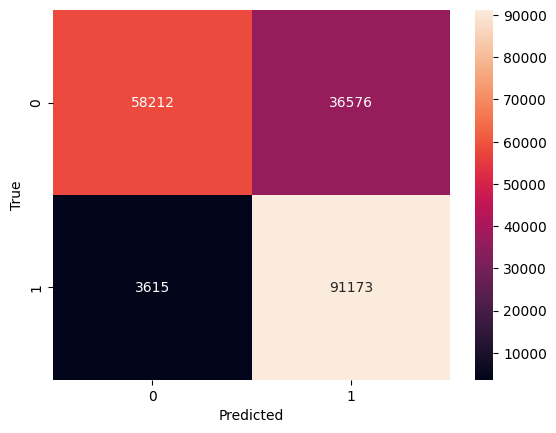

In [77]:
cm = confusion_matrix(y_test_over, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Default Settings

In [57]:
# Train NN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_over.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])

In [58]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
model.fit(X_train_over, y_train_over, epochs=10, batch_size=32, validation_data=(X_test_over, y_test_over))

Epoch 1/10
13818/13818 [==============================] - 72s 5ms/step - loss: 6.2060 - accuracy: 0.7314 - val_loss: 0.4875 - val_accuracy: 0.7792
Epoch 2/10
13818/13818 [==============================] - 61s 4ms/step - loss: 0.4824 - accuracy: 0.7771 - val_loss: 0.4604 - val_accuracy: 0.7967
Epoch 3/10
13818/13818 [==============================] - 70s 5ms/step - loss: 0.4780 - accuracy: 0.7806 - val_loss: 0.5968 - val_accuracy: 0.7832
Epoch 4/10
13818/13818 [==============================] - 62s 4ms/step - loss: 0.4619 - accuracy: 0.7900 - val_loss: 0.4636 - val_accuracy: 0.7915
Epoch 5/10
13818/13818 [==============================] - 69s 5ms/step - loss: 0.4676 - accuracy: 0.7855 - val_loss: 0.4532 - val_accuracy: 0.7912
Epoch 6/10
13818/13818 [==============================] - 60s 4ms/step - loss: 0.4611 - accuracy: 0.7906 - val_loss: 0.4538 - val_accuracy: 0.7973
Epoch 7/10
13818/13818 [==============================] - 61s 4ms/step - loss: 0.4555 - accuracy: 0.7931 - val_loss: 0

In [60]:
loss, accuracy = model.evaluate(X_test_over, y_test_over)
print(f"Accuracy: {accuracy*100}%")

5925/5925 [==============================] - 16s 3ms/step - loss: 0.4609 - accuracy: 0.8049
Accuracy: 80.49436807632446%


In [61]:
predictions = model.predict(X_test_over)
# If your model is a classifier, it's likely that you'll get probabilities
# You might want to convert these to actual class labels
predicted_classes = np.argmax(predictions, axis=1)

5925/5925 [==============================] - 12s 2ms/step


In [62]:
print(classification_report(y_test_over, predicted_classes))
print(confusion_matrix(y_test_over, predicted_classes))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78     94788
           1       0.75      0.92      0.82     94788

    accuracy                           0.80    189576
   macro avg       0.82      0.80      0.80    189576
weighted avg       0.82      0.80      0.80    189576

[[65629 29159]
 [ 7819 86969]]


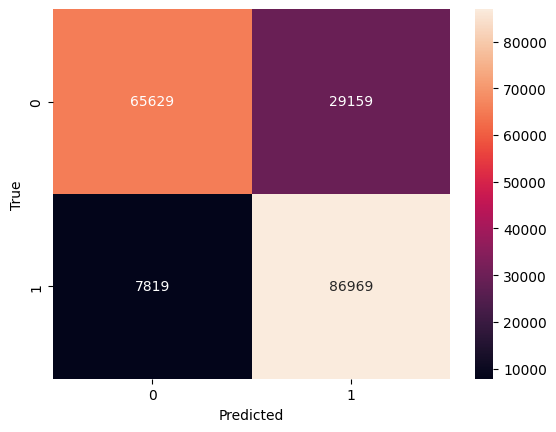

In [63]:
cm = confusion_matrix(y_test_over, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()